In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
import optuna
import joblib
import warnings
warnings.filterwarnings("ignore")

# <center><font color='WHITE'>IMPORTING DATA</font>

In [ ]:

df=pd.read_csv(r"C:\Users\vedan\Desktop\MACHINE_Learning_water_potability-main\water_potabilitydata.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [91]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.000000  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.700000    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.700000    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [96]:
print(df.tail())

            ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.700000   
3273  9.419510  175.762646  33155.578218     7.350233  333.700000   
3274  5.126763  230.603758  11983.869376     6.303357  333.700000   
3275  7.874671  195.102299  17404.177061     7.509306  333.700000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.300000   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  


In [97]:
print(df.shape)

(3276, 10)


# <center><font color='WHITE'>PRE-PROCESSING


In [10]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
print("ph mean:",df["ph"].mean())
print("Sulfate mean:",df["Sulfate"].mean())
print("Trihalomethanes mean:", df["Trihalomethanes"].mean())

ph mean: 7.080794504276835
Sulfate mean: 333.7757766108135
Trihalomethanes mean: 66.39629294676803


In [12]:
df['ph'] = df['ph'].fillna(7.0)
df['Sulfate'] = df['Sulfate'].fillna(333.7)
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(66.3)

In [13]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# <center><font color='WHITE'>DATA VISUALISATION</font>

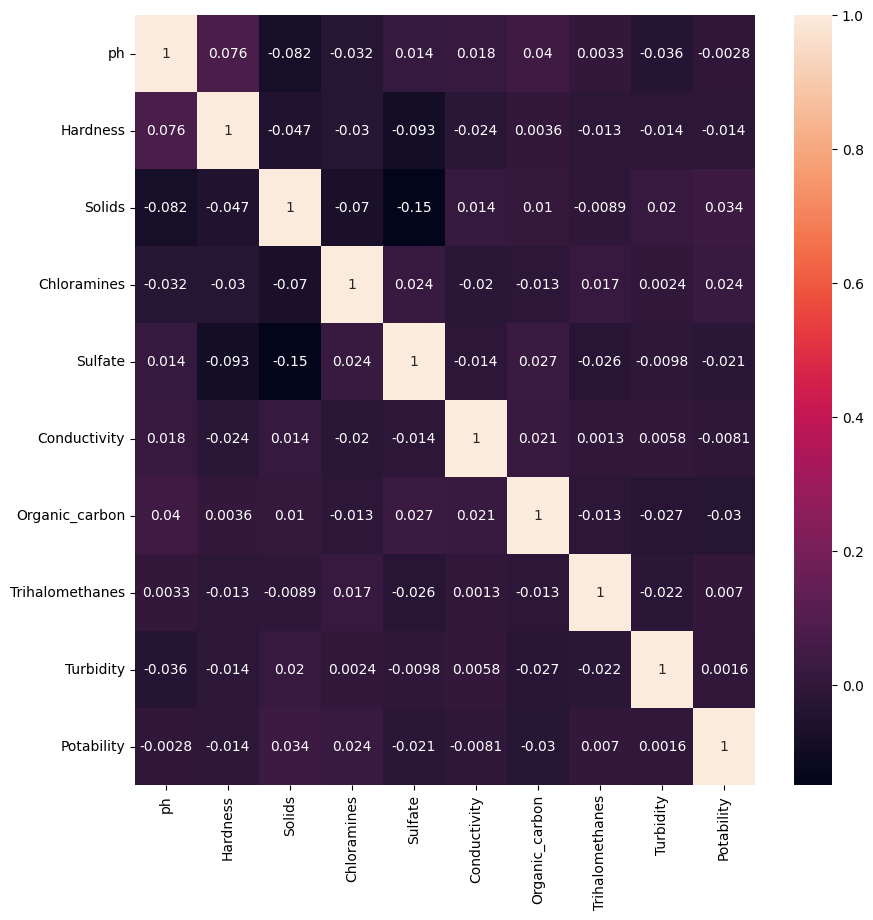

In [14]:
#hEAT MAP
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.show()

In [15]:
x = df.drop("Potability", axis=1)
y = df.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

In [16]:
# sns.countplot(x="Potability",data=df, palette={0:'pink', 1:'purple'})
# plt.xlabel('Potable Water:         0 (pink) -> No,       1 (purple) -> Yes')
# plt.ylabel('Amount of water')
# porc = (len(df[df.Potability==1]) / len(df.Potability)) * 100
# print('The percentage of waters that are potable is: {:.2f}%'.format(porc))


In [17]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [18]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [19]:
x.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.068685   196.369496  22014.092526     7.122277   333.757711   
std       1.470239    32.879761   8768.570828     1.583085    36.142627   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.000000   196.967627  20927.833607     7.130299   333.700000   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.391531     3.966786  
std       80.824064        3.308162        15.769895     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        56.647656     3.439711  
50%      421.884968       14.218338        66.300000     3.955028  
75%      481.792304       16.557652        76.666609     4.500320  
max      753.342620       28.300000       124.000000     6.739000

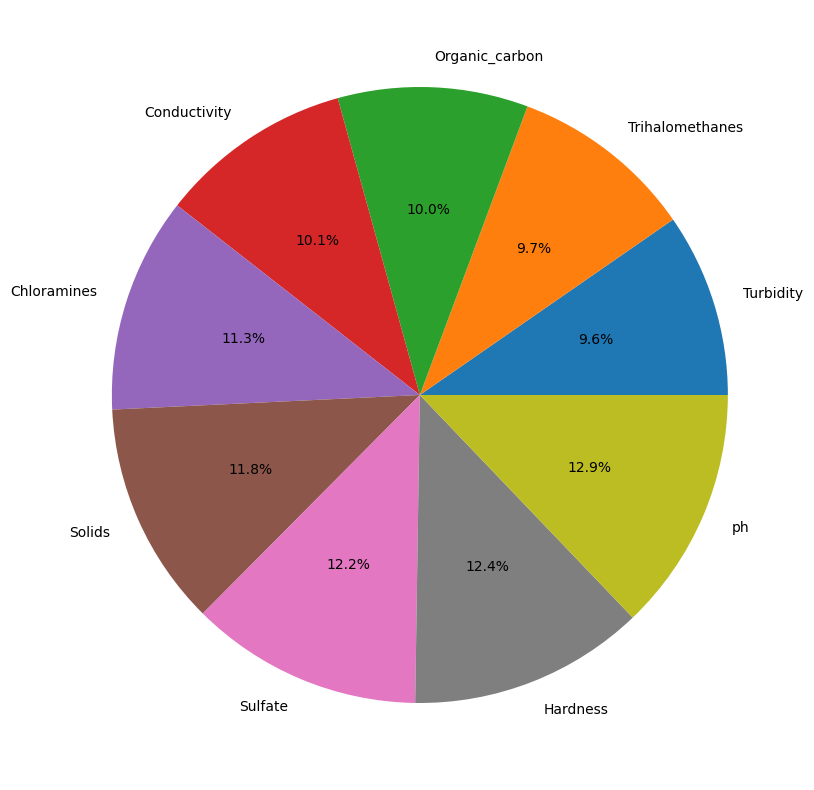

In [20]:
#Finding out the most important variables
clasification = RandomForestClassifier()
clasification.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,autopct='%0.1f%%')
plt.show()

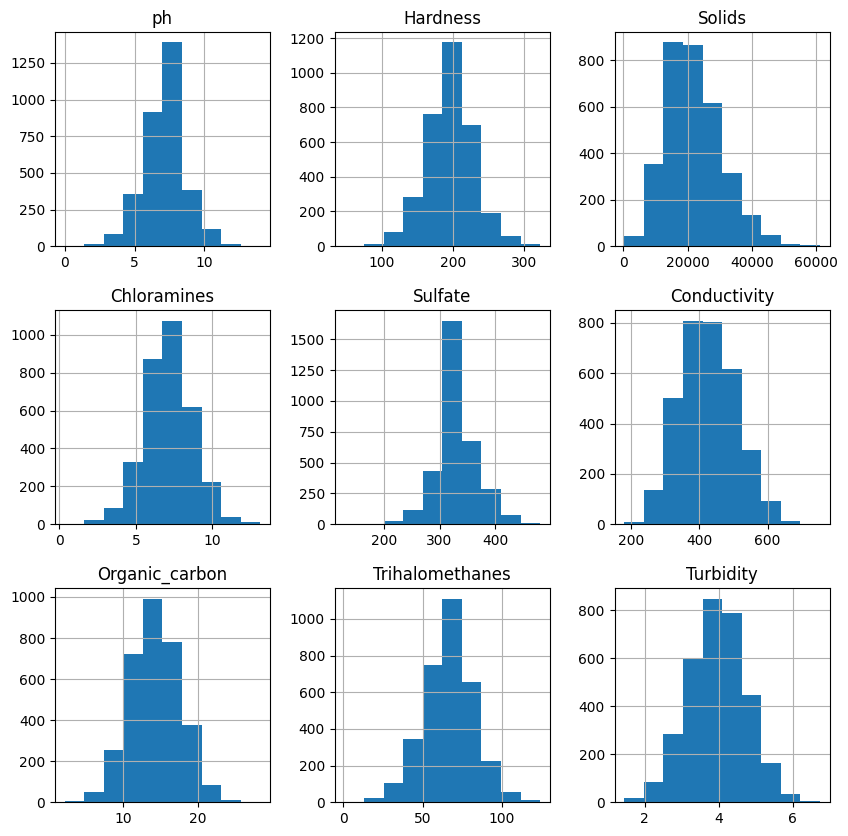

In [21]:
#Histograms
fig = plt.figure(figsize = (10,10))
var = df.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

<Axes: xlabel='ph', ylabel='Count'>

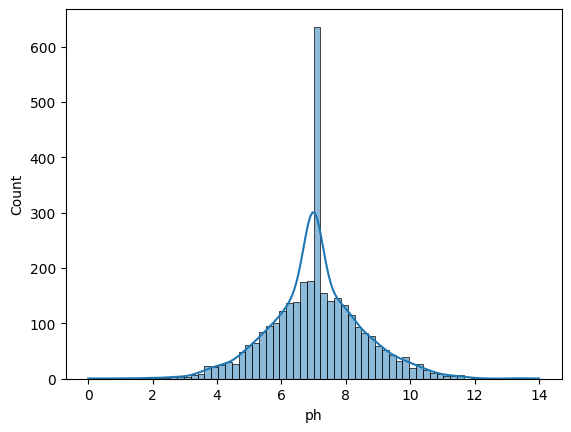

In [22]:
sns.histplot(df.ph,kde = True)

In [23]:
df[['ph','Sulfate','Trihalomethanes']].describe().T

count        mean        std      min         25%    50%  \
ph               3276.0    7.068685   1.470239    0.000    6.277673    7.0   
Sulfate          3276.0  333.757711  36.142627  129.000  317.094638  333.7   
Trihalomethanes  3276.0   66.391531  15.769895    0.738   56.647656   66.3   

                        75%         max  
ph                 7.870050   14.000000  
Sulfate          350.385756  481.030642  
Trihalomethanes   76.666609  124.000000

<Axes: xlabel='ph', ylabel='Sulfate'>

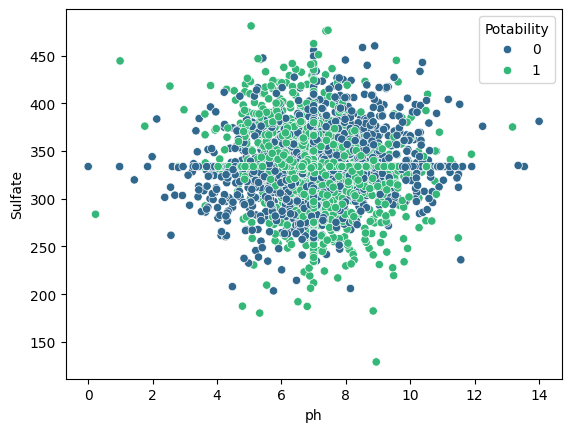

In [24]:
sns.scatterplot(data = df, x = "ph",y = "Sulfate",hue="Potability",palette="viridis")

<Axes: xlabel='ph', ylabel='Trihalomethanes'>

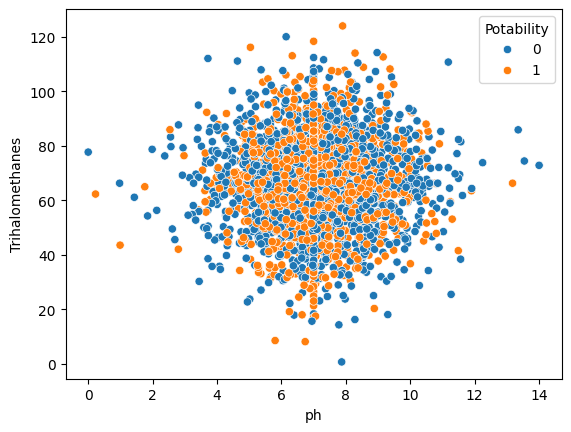

In [25]:
sns.scatterplot(data = df,x='ph',y="Trihalomethanes",hue="Potability")

<Axes: xlabel='Trihalomethanes', ylabel='Sulfate'>

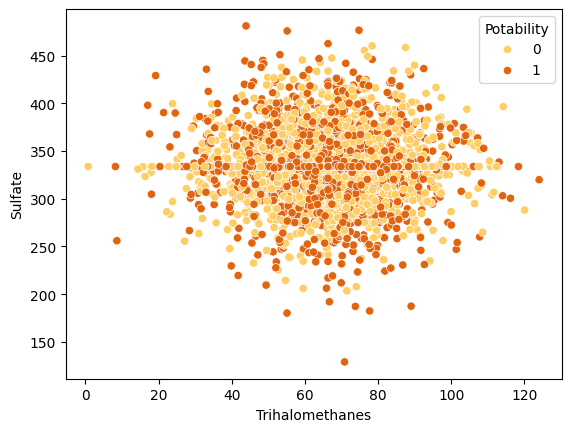

In [26]:
sns.scatterplot(data = df, x = "Trihalomethanes",y = "Sulfate",hue="Potability",palette="YlOrBr")

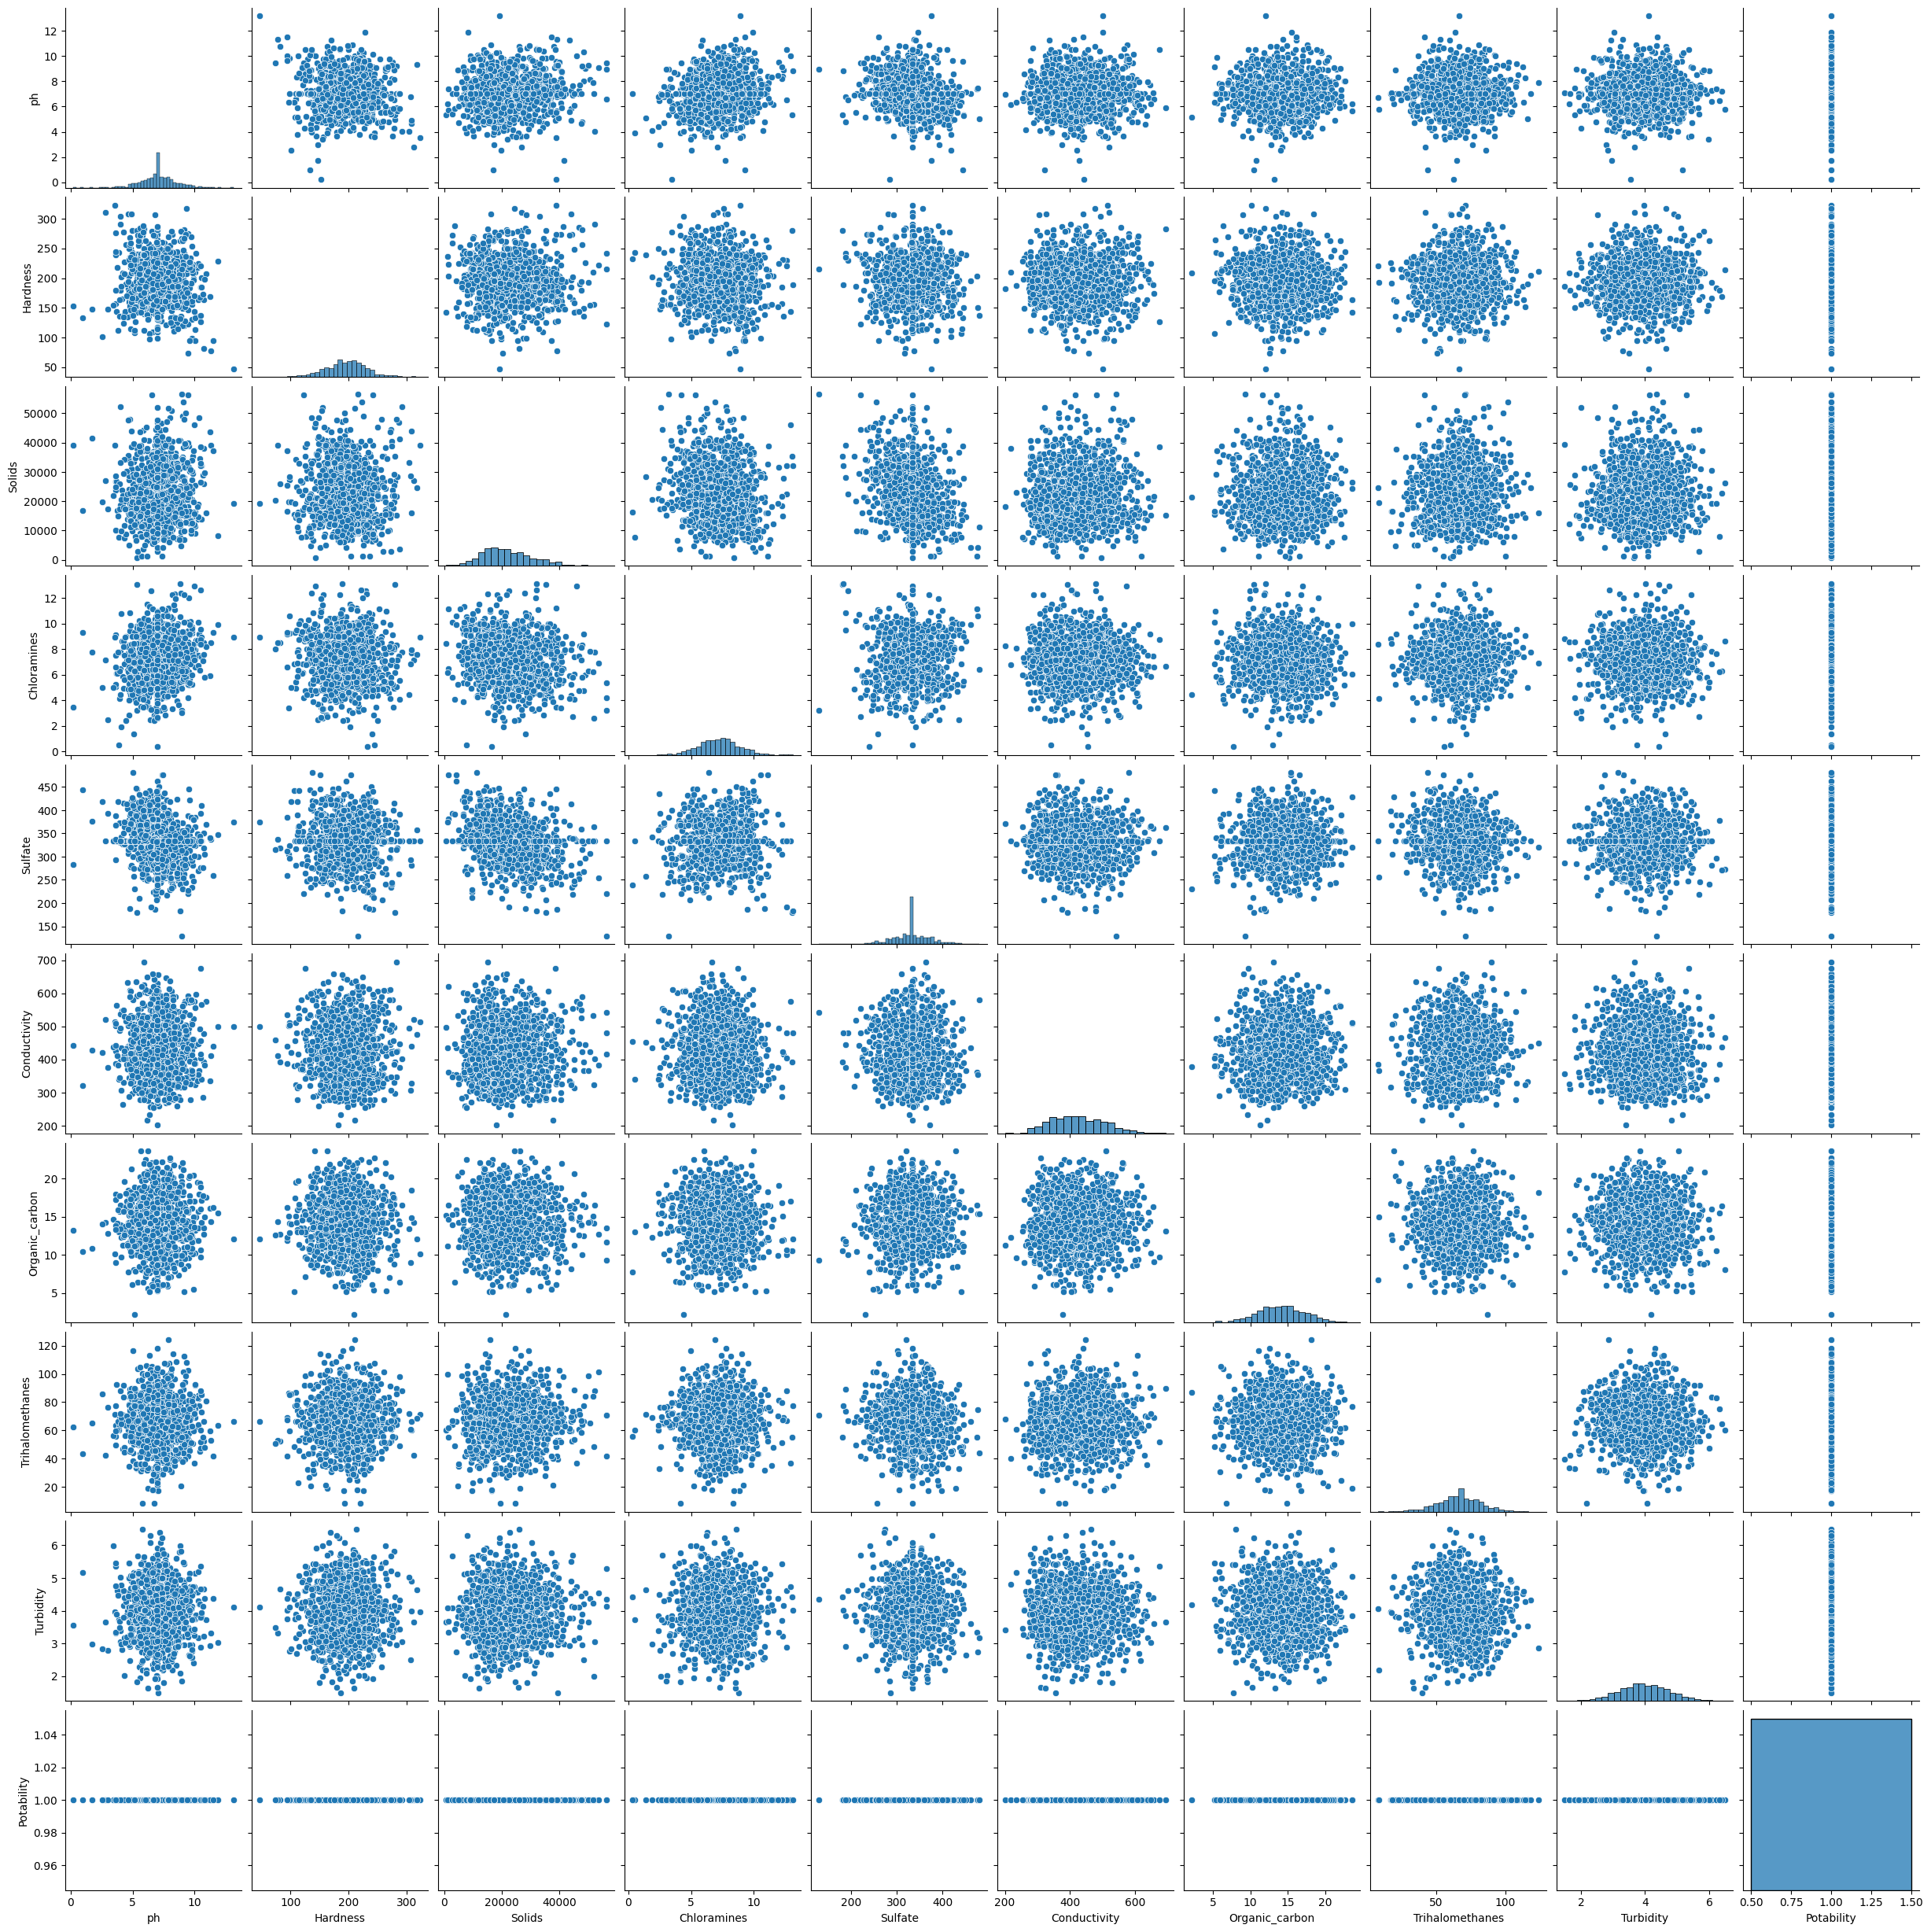

In [27]:
positive = df[df['Potability'] == 1]
sns.pairplot(positive)

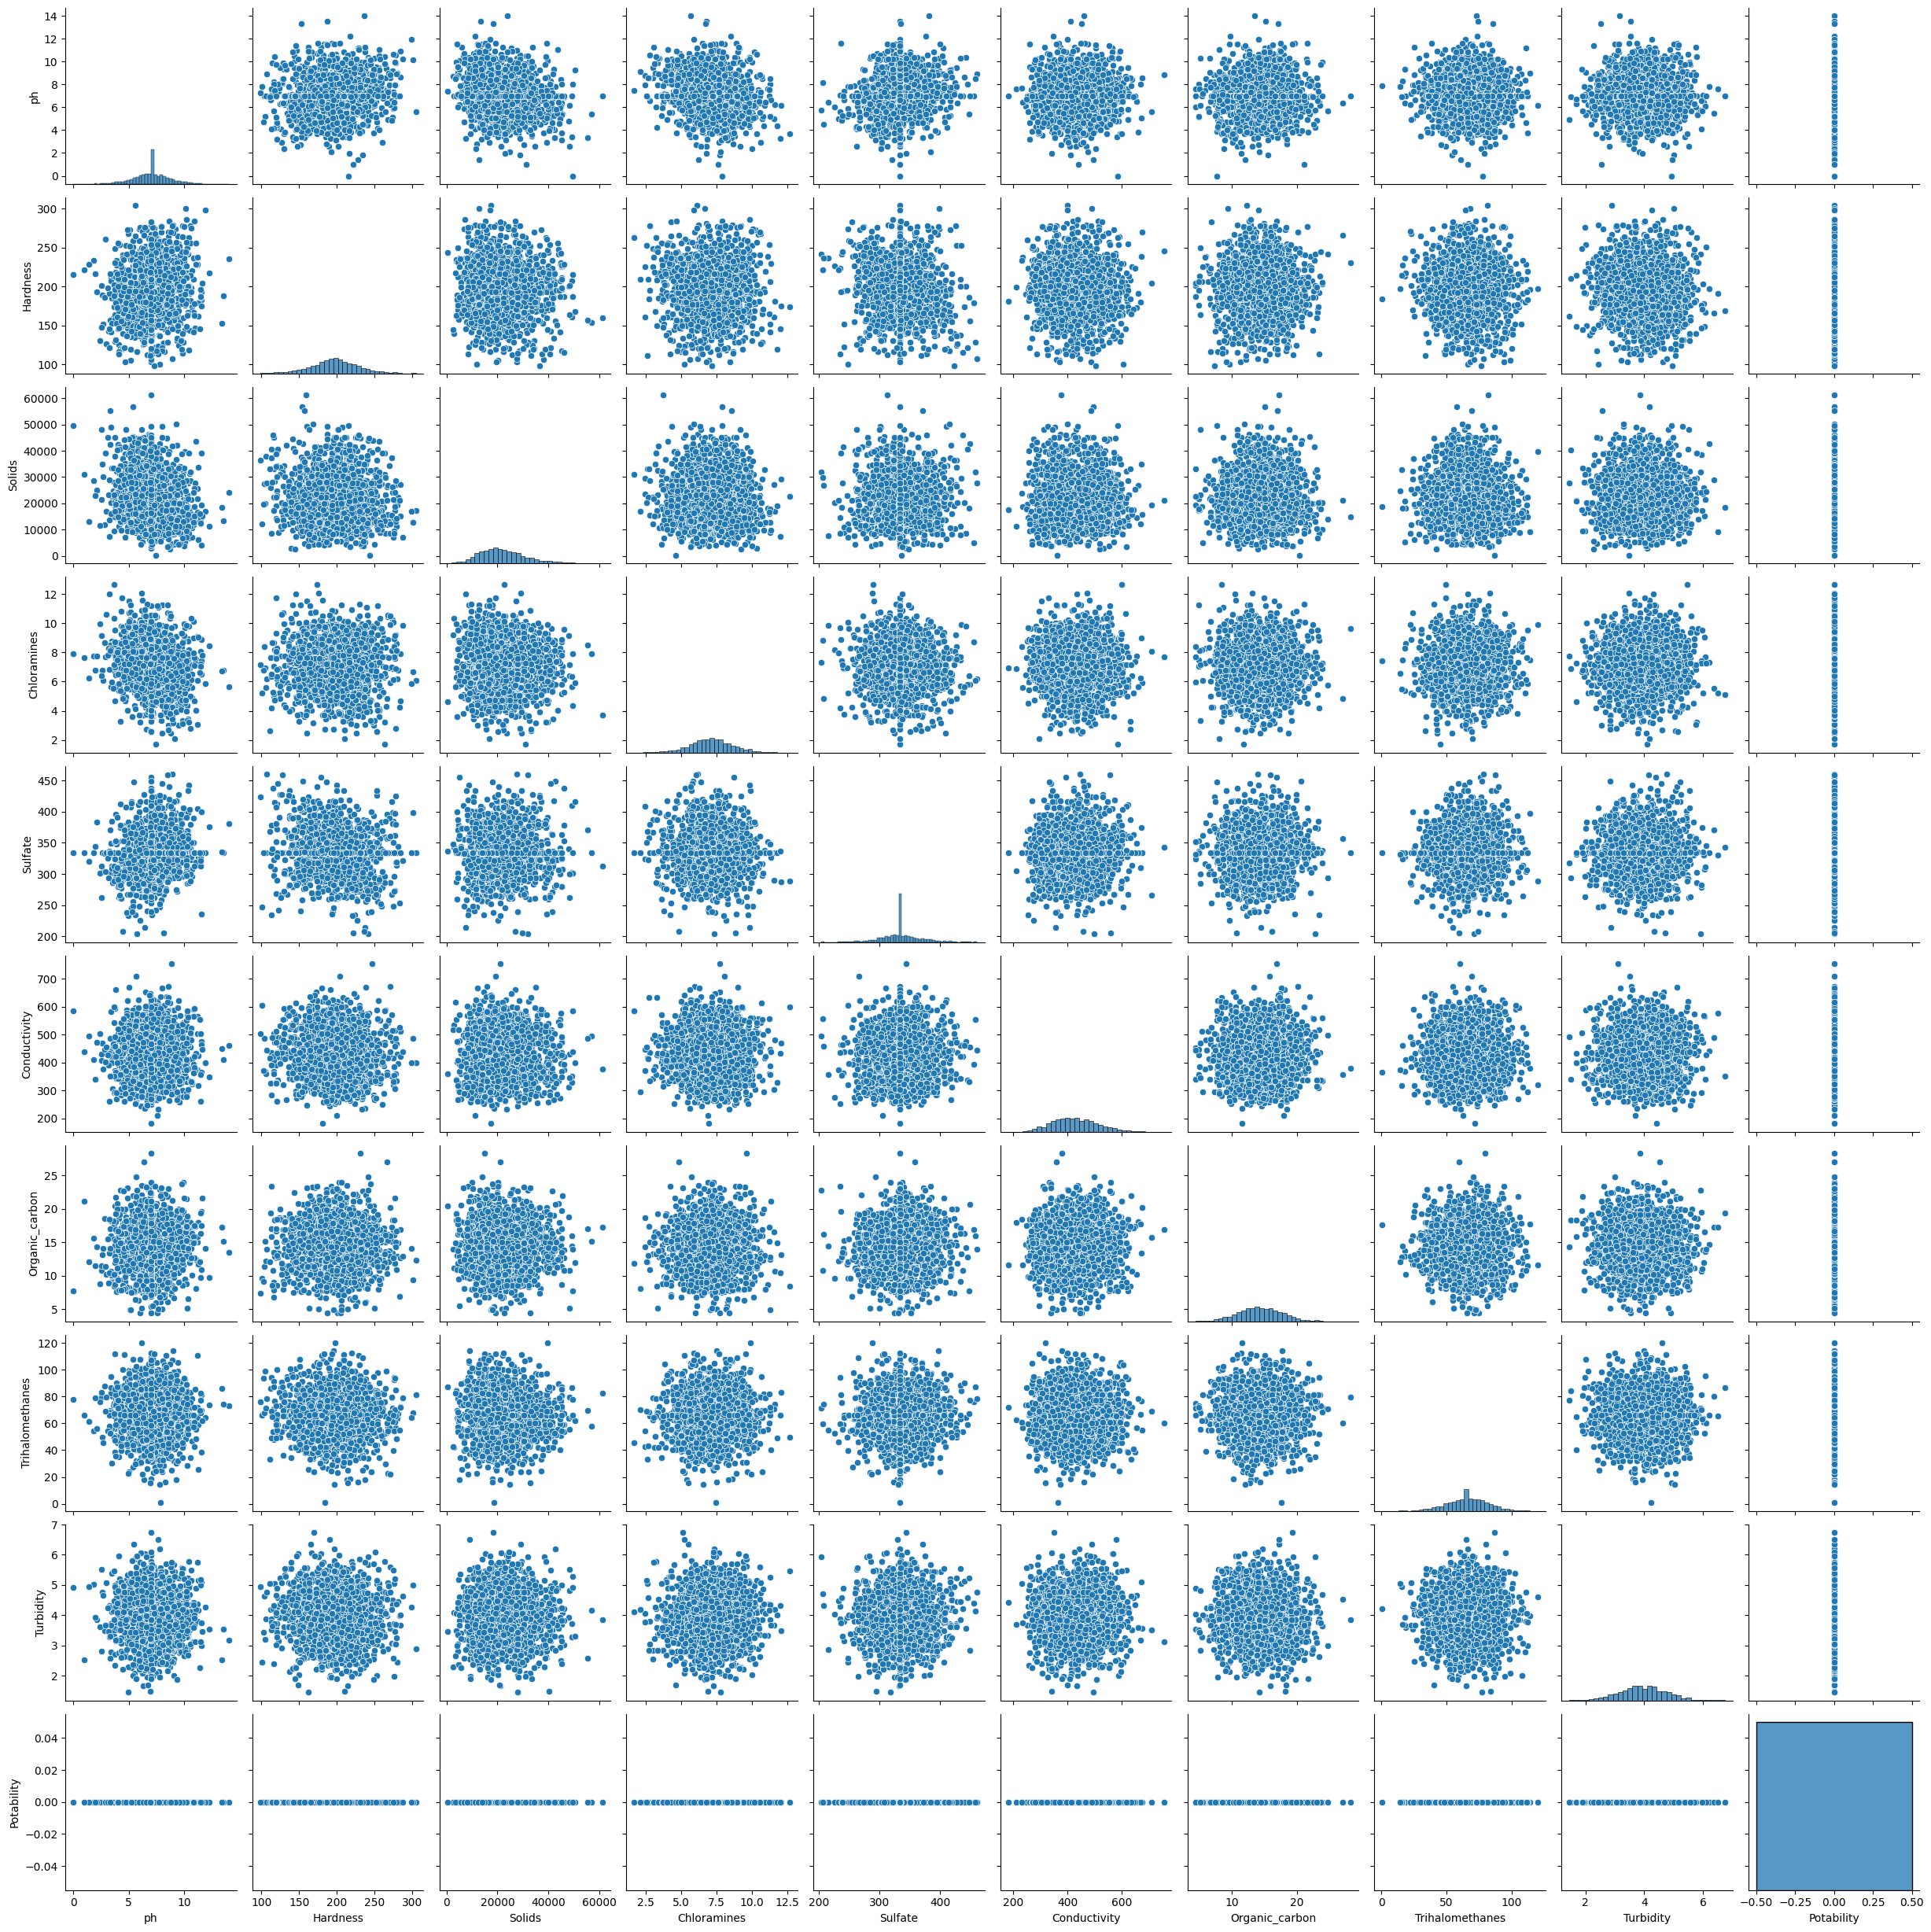

In [28]:
negative = df[df['Potability'] == 0]
sns.pairplot(negative)

# <center><font color='WHITE'>ALGORITHMS</font>

## <font color='orange'>KNN IMPLEMENTATION

In [29]:
X = df.drop(['Potability'],axis=1)
Y = df['Potability']
X_stdscle = StandardScaler().fit_transform(X.values)

#### RESULT 1

In [30]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors =5,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
#printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  75.578
Test Accuracy :  61.546
Confusion Matrix:
[[437 148]
 [230 168]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       585
           1       0.53      0.42      0.47       398

    accuracy                           0.62       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.61      0.62      0.61       983



#### RESULT 2

In [32]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 3,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
#printing the accuracy and all other scores
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  81.204
Test Accuracy :  61.546
Confusion Matrix:
[[421 164]
 [214 184]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       585
           1       0.53      0.46      0.49       398

    accuracy                           0.62       983
   macro avg       0.60      0.59      0.59       983
weighted avg       0.61      0.62      0.61       983



#### RESULT 3

In [34]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 2,p=1,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [35]:
#printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  79.459
Test Accuracy :  62.05500000000001
Confusion Matrix:
[[512  73]
 [300  98]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.88      0.73       585
           1       0.57      0.25      0.34       398

    accuracy                           0.62       983
   macro avg       0.60      0.56      0.54       983
weighted avg       0.61      0.62      0.58       983



<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parameters</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>k:5,p:2</td>
        <td  style='text-align:center'>Train: 75.578 , Test:61.546 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>k:3,p:2</td>
        <td  style='text-align:center'>Train: 75.578 , Test:61.546 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>k:5,p:1</td>
        <td  style='text-align:center'>Train: 79.459 , Test: 62.055</td>
    </tr>

In [36]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, knn_clf.predict(x_test)))

# RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, knn_clf.predict(x_test))))

#MAE
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test, knn_clf.predict(x_test)))

#R2
from sklearn.metrics import r2_score 
print("R2:",r2_score(y_test, knn_clf.predict(x_test)))

MSE: 0.37945066124109866
RMSE: 0.6159956665765586
MAE: 0.37945066124109866
R2: -0.5747927672550794


Text(50.722222222222214, 0.5, 'Prediction Label')

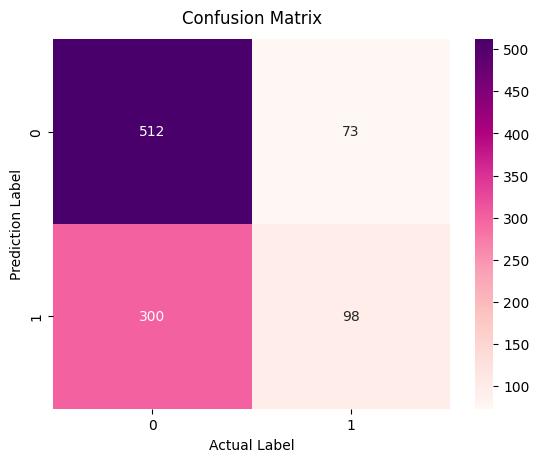

In [37]:
sns.heatmap(data=confusion_matrix(y_test, knn_clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

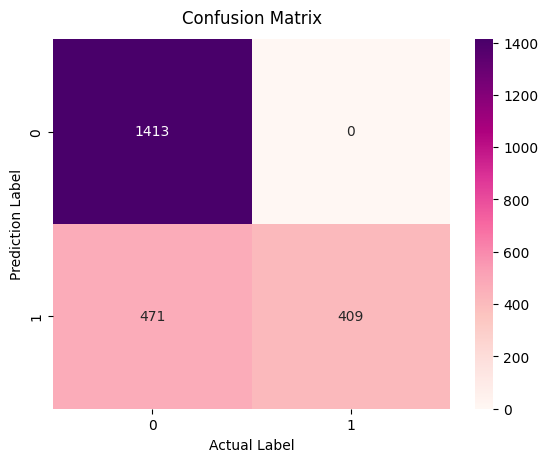

In [38]:
sns.heatmap(data=confusion_matrix(y_train, knn_clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

## <font color='orange'> DECISION TREE IMPLEMENTATION

#### RESULT 1

In [39]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='best')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 66.68
Test Accuracy: 62.970498474059
Confusion Matrix:
[[546  39]
 [325  73]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.93      0.75       585
           1       0.65      0.18      0.29       398

    accuracy                           0.63       983
   macro avg       0.64      0.56      0.52       983
weighted avg       0.64      0.63      0.56       983



#### RESULT 2

In [40]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='random')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 74.84
Test Accuracy: 63.78433367243134
Confusion Matrix:
[[532  53]
 [303  95]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.91      0.75       585
           1       0.64      0.24      0.35       398

    accuracy                           0.64       983
   macro avg       0.64      0.57      0.55       983
weighted avg       0.64      0.64      0.59       983



#### RESULT 3

In [41]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='best')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 78.63
Test Accuracy: 63.275686673448625
Confusion Matrix:
[[521  64]
 [297 101]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.89      0.74       585
           1       0.61      0.25      0.36       398

    accuracy                           0.63       983
   macro avg       0.62      0.57      0.55       983
weighted avg       0.63      0.63      0.59       983



In [42]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,y_pred))

0.3672431332655137
0.6060058855040219
0.3672431332655137
-0.5241291929734146


Text(50.722222222222214, 0.5, 'Prediction Label')

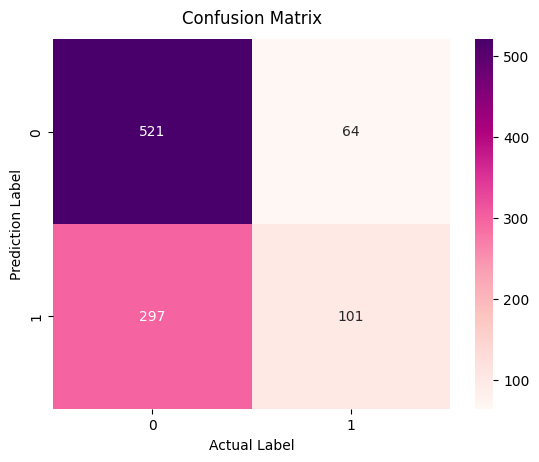

In [43]:
sns.heatmap(data=confusion_matrix(y_test, clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

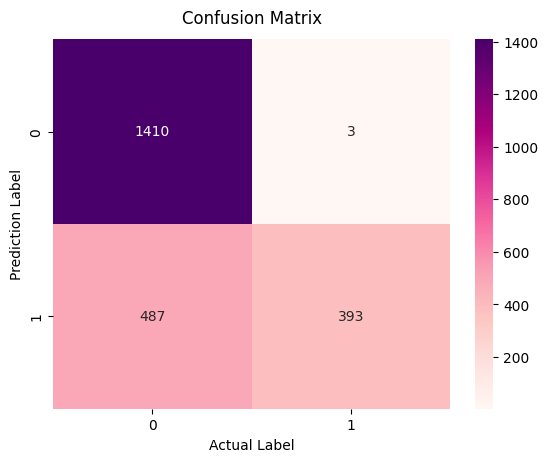

In [44]:
sns.heatmap(data=confusion_matrix(y_train, clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

In [45]:
# model = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
# model.fit(x_train, y_train)
# print(metrics.accuracy_score(y_train, model.predict(x_train)) * 100)
# print(metrics.accuracy_score(y_test, model.predict(x_test)) * 100)

# fig, ax = plt.subplots(1, 1, figsize = (15, 15))
# #x_aux = pd.DataFrame(x)
# tree.plot_tree(model, impurity = True, class_names = str(Y),feature_names = X.columns);

### RANDOM FOREST IMPLEMENTATION

#### RESULT 1

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150,criterion='entropy',max_depth = 10)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[555  30]
 [317  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.95      0.76       585
           1       0.73      0.20      0.32       398

    accuracy                           0.65       983
   macro avg       0.68      0.58      0.54       983
weighted avg       0.67      0.65      0.58       983

Accuracy: 64.6998982706002


#### RESULT 2

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500,criterion='entropy',max_depth = 8)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[555  30]
 [322  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.95      0.76       585
           1       0.72      0.19      0.30       398

    accuracy                           0.64       983
   macro avg       0.67      0.57      0.53       983
weighted avg       0.67      0.64      0.57       983

Accuracy: 64.1912512716175


#### RESULT 3

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth = None)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[521  64]
 [284 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       585
           1       0.64      0.29      0.40       398

    accuracy                           0.65       983
   macro avg       0.64      0.59      0.57       983
weighted avg       0.64      0.65      0.61       983

Accuracy: 64.59816887080366


In [52]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, rf_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rf_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,rf_pred))

0.3540183112919634
0.594994379210395
0.3540183112919634
-0.46924365416827785


Text(50.722222222222214, 0.5, 'Prediction Label')

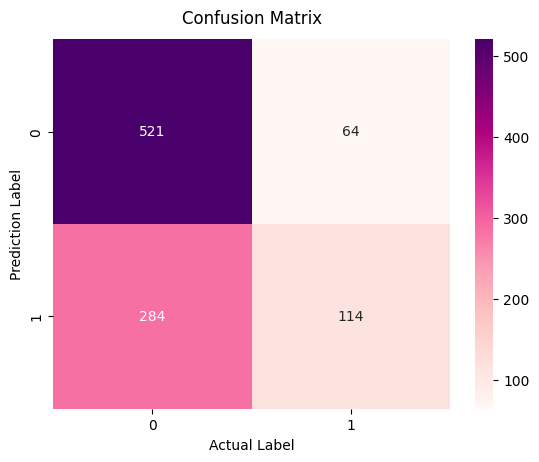

In [53]:
sns.heatmap(data=confusion_matrix(y_test, classifier.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

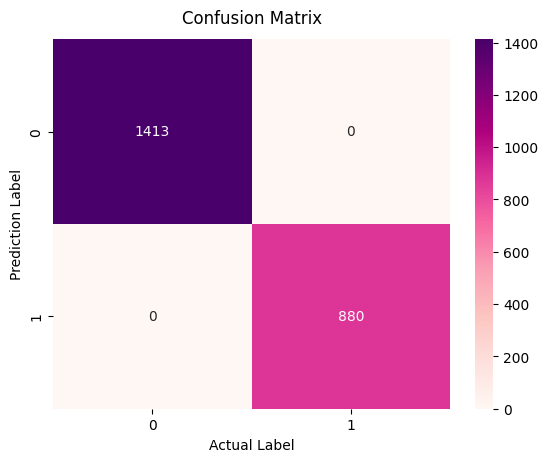

In [54]:
sns.heatmap(data=confusion_matrix(y_train, classifier.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

In [55]:
importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(classifier.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(100)

importance
feature                    
ph                    0.130
Hardness              0.123
Solids                0.114
Sulfate               0.114
Chloramines           0.110
Turbidity             0.104
Conductivity          0.103
Trihalomethanes       0.102
Organic_carbon        0.100

<Axes: xlabel='feature'>

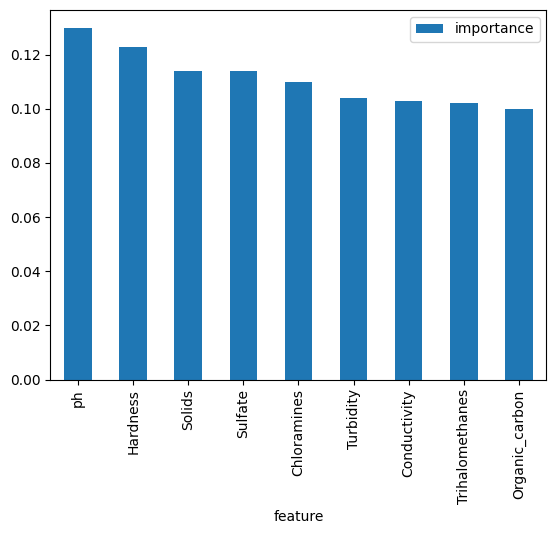

In [56]:
importances.plot.bar()

### NAIVE BAIYES IMPLEMENTATION

In [57]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
g_pred = gaussian.predict(x_test)  
train_acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
test_acc_gaussian = round(gaussian.score(x_test, g_pred) * 100, 2)

In [58]:
result = confusion_matrix(y_test, g_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, g_pred)
print("Classification Report:",)
print (result1)
print('Train Accuracy:',train_acc_gaussian)
print('Test Accuracy:',test_acc_gaussian)

Confusion Matrix:
[[515  70]
 [304  94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.73       585
           1       0.57      0.24      0.33       398

    accuracy                           0.62       983
   macro avg       0.60      0.56      0.53       983
weighted avg       0.61      0.62      0.57       983

Train Accuracy: 63.28
Test Accuracy: 100.0


In [59]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, g_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, g_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, g_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,g_pred))

0.38046795523906407
0.6168208453344164
0.38046795523906407
-0.5790147317785515


### LOGISTIC REGRESSION IMPLEMENTATION

In [60]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=100,random_state=1, n_jobs=10)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))
result = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, lr_pred)
print("Classification Report:",)
print (result1)

Train Accuracy:  61.58
Test Accuracy: 59.5116988809766
Confusion Matrix:
[[585   0]
 [398   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



In [61]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))
result = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, lr_pred)
print("Classification Report:",)
print (result1)

Train Accuracy:  61.58
Test Accuracy: 59.5116988809766
Confusion Matrix:
[[585   0]
 [398   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



In [62]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, lr_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, lr_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,lr_pred))

0.40488301119023395
0.6363041813395807
0.40488301119023395
-0.6803418803418808


Text(50.722222222222214, 0.5, 'Prediction Label')

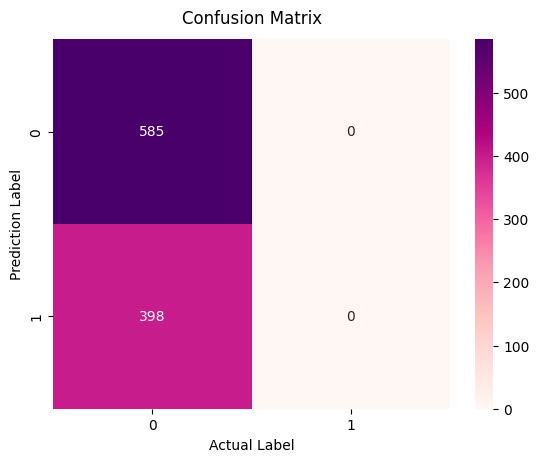

In [63]:
sns.heatmap(data=confusion_matrix(y_test, lr_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

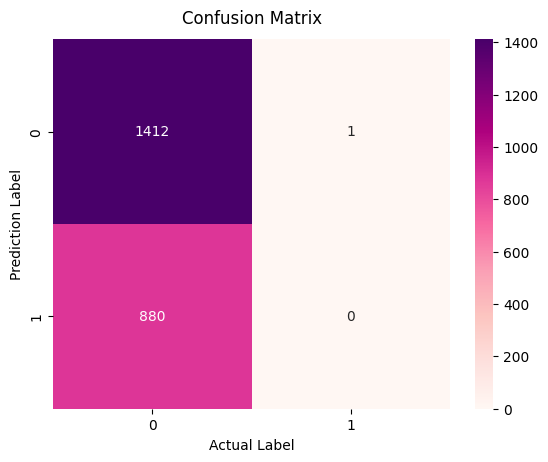

In [64]:
sns.heatmap(data=confusion_matrix(y_train, lr_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

### STOCHASTIC GRADIENT DESCENT IMPLEMENTATION

In [65]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
test_acc_sgd = round(sgd.score(x_test, sgd_pred) * 100, 2)
print('Accuracy on training data : ', acc_sgd)
print('Accuracy on test data : ', test_acc_sgd)
result = confusion_matrix(y_test,sgd_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, sgd_pred)
print("Classification Report:",)
print (result1)

Accuracy on training data :  55.52
Accuracy on test data :  100.0
Confusion Matrix:
[[416 169]
 [271 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.65       585
           1       0.43      0.32      0.37       398

    accuracy                           0.55       983
   macro avg       0.52      0.52      0.51       983
weighted avg       0.53      0.55      0.54       983



In [66]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, sgd_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, sgd_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, sgd_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,sgd_pred))

0.4476093591047813
0.6690361418524273
0.4476093591047813
-0.8576643903277075


Text(50.722222222222214, 0.5, 'Prediction Label')

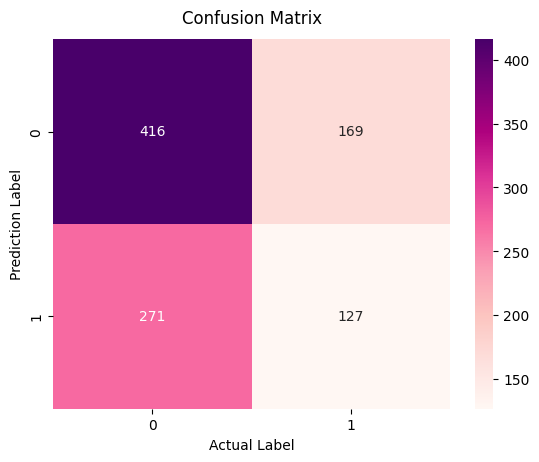

In [67]:
sns.heatmap(data=confusion_matrix(y_test, sgd.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

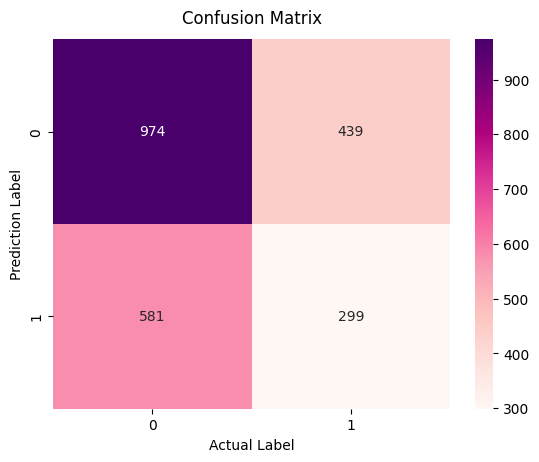

In [68]:
sns.heatmap(data=confusion_matrix(y_train, sgd.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

### SVM: SUPPORT VECTOR MACHINE IMPLEMENTATION

In [69]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

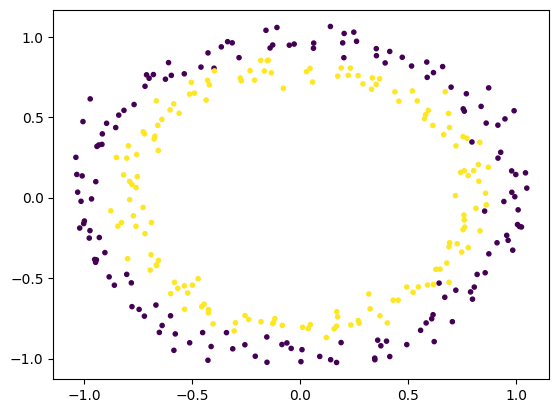

In [70]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [71]:
classifier1 = svm.SVC(kernel='rbf')

classifier1.fit(x_train,y_train)

x_train_prediction = classifier1.predict(x_train)
training_data_accuray = accuracy_score(x_train_prediction,y_train)* 100

print('Accuracy on training data : ', training_data_accuray)

x_test_prediction = classifier1.predict(x_test)
test_data_accuray = accuracy_score(x_test_prediction,y_test)* 100

print('Accuracy on test data : ', test_data_accuray)

result = confusion_matrix(y_test,x_test_prediction)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, x_test_prediction)
print("Classification Report:",)
print (result1)

Accuracy on training data :  73.222852158744
Accuracy on test data :  66.63275686673448
Confusion Matrix:
[[541  44]
 [284 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       585
           1       0.72      0.29      0.41       398

    accuracy                           0.67       983
   macro avg       0.69      0.61      0.59       983
weighted avg       0.68      0.67      0.62       983



### XGBOOST

#### RESULT 1

In [72]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5, 
                            n_estimators = 100,
                              scale_pos_weight=2)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  38.37767117313563
Accuracy on testing data :  40.4883011190234


#### RESULT 2

In [74]:
xgb_model = xgb.XGBClassifier(learning_rate=0.01,
                            max_depth =20, 
                            n_estimators = 80,
                              scale_pos_weight=5)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  71.9581334496293
Accuracy on testing data :  46.79552390640895


#### RESULT 3

In [76]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5, 
                            n_estimators = 100,
                              scale_pos_weight=1)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  61.62232882686437
Accuracy on testing data :  59.5116988809766


In [78]:
xgb_pred = xgb_model.predict(x_test)
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, xgb_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, xgb_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test, xgb_pred))

0.40488301119023395
0.6363041813395807
0.40488301119023395
-0.6803418803418808


Text(50.722222222222214, 0.5, 'Prediction Label')

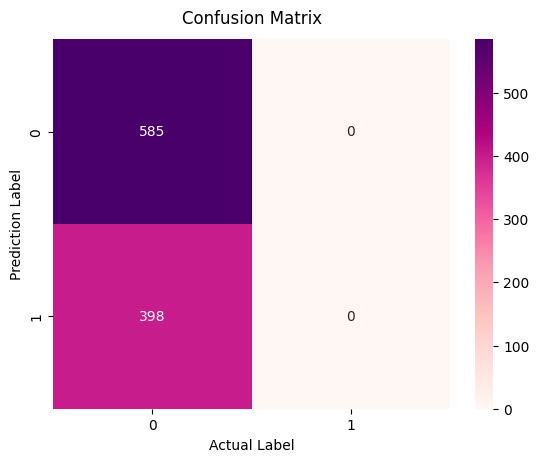

In [79]:
sns.heatmap(data=confusion_matrix(y_test, xgb_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

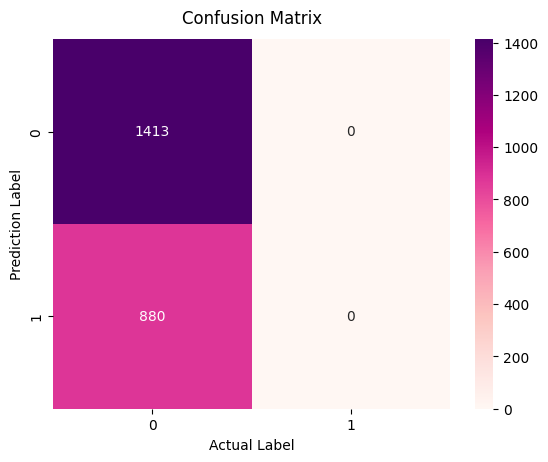

In [80]:
sns.heatmap(data=confusion_matrix(y_train, xgb_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# <center><font color='WHITE'>FURTHER EVALUATION</center> 

In [81]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(classifier, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[1252,  161],
       [ 609,  271]], dtype=int64)

The first row is about the not-potable-predictions: 1200 values were correctly classified as not potable for water consumption (called true negatives) and 188 were wrongly classified as not potable (false positives).
The second row is about the ptable-predictions: 610 values were wrongly classified as potable (false negatives) and 295 were correctly classified as survived (true positives).

In [82]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.6273148148148148
Recall: 0.3079545454545455


In [83]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.41310975609756095

Model Saving

In [84]:
import joblib

joblib.dump(xgb_model,"xgb_model.joblib")

['xgb_model.joblib']

Sample use

In [85]:
# Load the saved model
new_model = joblib.load("xgb_model.joblib")
scaler = MinMaxScaler()
scaler.fit(x_train)  # Replace with your dataset

# Prepare new data
x_values = [[11.092223456290965, 181.10150923612525, 17978.98633892625, 6.546599974207941, 310.13573752420444, 398.41081338184466, 11.558279443446395, 31.997992727424737, 4.075075425430034],
           [7.119824384, 156.7049933, 18730.81365, 3.606036091, 282.3440505, 347.7150273, 15.92953591, 79.50077834, 3.445756223],[7.657991236998258,236.96088924616282,14245.78912129943,6.28906485943393,373.1653628100853,416.62418891074776,10.464238582078508,85.85276860502765,2.437296287559579],
           [13.259651603,408.3794303,37356.7464,12.565487273,756.4738386,580.2401927,9.567692791,108.44186536,7.213405262],[9.58789502997377,195.83710515312802,11351.86185617761,6.267475696262486,366.42892756901426,323.79486235142434,13.068242100406962,37.35308022042619,4.666916974276835]]

# Transform the new data using the scaler
x = scaler.transform(x_values)

# Make predictions
predictions = new_model.predict(x)

print(predictions)

[0 0 0 0 0]


# <center><font color='WHITE'>COMPARISIONS</font>

<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Algorithms</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>KNN-K Nearest Neighbor</td>
        <td  style='text-align:center'>Train: 79.459 , Test:62.055 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>Decision tree</td>
        <td  style='text-align:center'>Train: 78.59 , Test:63.58 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>Random Forest</td>
        <td  style='text-align:center'>Train: 100 , Test: 66.429</td>
    </tr>
    <tr>
        <td  style='text-align:center'>Naive Bayes</td>
        <td  style='text-align:center'>Train: 63.28 , Test:100 </td>
    </tr>     
    <tr>
        <td  style='text-align:center'>Logistic Regression</td>
        <td  style='text-align:center'>Train: 61.58 , Test:59.51 </td>
    </tr>   
    <tr>
        <td  style='text-align:center'>SVM- Support Vector Machine</td>
        <td  style='text-align:center'>Train: 73.222 , Test:66.63 </td>
    </tr>  
    <tr>
        <td  style='text-align:center'>Stochastic Gradient Descent</td>
        <td  style='text-align:center'>Train: 61.27, Test:100.0 </td>
    </tr> 
    <tr>
        <td  style='text-align:center'>XGBoost</td>
        <td  style='text-align:center'>Train: 70.61, Test:63.48 </td>
    </tr> 

# <center><font color='WHITE'>HYPER PARAMETER TUNING</font>

From all the above confusion matrices we can also see that the following models are not very good at predecting the outcome so we use hyper parameter tuning to fix that 

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
import optuna
import joblib

# Load data
data = pd.read_csv(r"C:\Users\vedan\Desktop\MACHINE_Learning_water_potability-main\water_potabilitydata.csv")
print(data.head())

# Preprocess data
data.dropna(inplace=True)
x = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

scaler = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Function to optimize hyperparameters
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['RandomForest', 'XGBoost'])
    if classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    else:
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        clf = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test, y_pred)

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
best_params = study.best_params

# Train the best model
if best_params['classifier'] == 'RandomForest':
    best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
else:
    best_model = XGBClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], max_depth=best_params['max_depth'])

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Evaluate the model
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

# Save the model
joblib.dump(best_model, "water_potability.joblib")

# Predict on new data
x_values = [[11.092223456290965, 181.10150923612525, 17978.98633892625, 6.546599974207941, 310.13573752420444, 398.41081338184466, 11.558279443446395, 31.997992727424737, 4.075075425430034],
           [7.119824384, 156.7049933, 18730.81365, 3.606036091, 282.3440505, 347.7150273, 15.92953591, 79.50077834, 3.445756223],
           [7.657991236998258, 236.96088924616282, 14245.78912129943, 6.28906485943393, 373.1653628100853, 416.62418891074776, 10.464238582078508, 85.85276860502765, 2.437296287559579],
           [13.259651603, 208.3794303, 37356.7464, 8.565487273, 256.4738386, 380.2401927, 5.567692791, 68.44186536, 4.213405262],
           [9.58789502997377, 195.83710515312802, 11351.86185617761, 6.267475696262486, 366.42892756901426, 323.79486235142434, 13.068242100406962, 37.35308022042619, 4.666916974276835]]
std_values = scaler.transform(x_values)
val = best_model.predict(std_values)
print(val)


[I 2024-11-16 01:41:06,138] A new study created in memory with name: no-name-dc7061bc-dee1-4aa7-be8a-8e79266fe517


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


[I 2024-11-16 01:41:09,159] Trial 0 finished with value: 0.6633663366336634 and parameters: {'classifier': 'RandomForest', 'n_estimators': 441, 'max_depth': 29}. Best is trial 0 with value: 0.6633663366336634.
[I 2024-11-16 01:41:09,773] Trial 1 finished with value: 0.6534653465346535 and parameters: {'classifier': 'XGBoost', 'n_estimators': 85, 'learning_rate': 0.0567129291807941, 'max_depth': 27}. Best is trial 0 with value: 0.6633663366336634.
[I 2024-11-16 01:41:12,323] Trial 2 finished with value: 0.6534653465346535 and parameters: {'classifier': 'RandomForest', 'n_estimators': 436, 'max_depth': 14}. Best is trial 0 with value: 0.6633663366336634.
[I 2024-11-16 01:41:12,557] Trial 3 finished with value: 0.7029702970297029 and parameters: {'classifier': 'XGBoost', 'n_estimators': 399, 'learning_rate': 0.16831389111572903, 'max_depth': 5}. Best is trial 3 with value: 0.7029702970297029.
[I 2024-11-16 01:41:15,210] Trial 4 finished with value: 0.6831683168316832 and parameters: {'cla

Accuracy score:  0.7227722772277227
Precision score:  0.8
Confusion matrix:
 [[45  7]
 [21 28]]
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76        52
           1       0.80      0.57      0.67        49

    accuracy                           0.72       101
   macro avg       0.74      0.72      0.71       101
weighted avg       0.74      0.72      0.72       101

[0 0 1 1 0]
